In [1]:
import datetime
import pandas as pd
import numpy as np
from graphviz import Digraph  # 画图用库
# 载入数据
df = pd.read_csv('advertising_data.csv')
# 显示部分数据
df.head()


,date,source,site,channel,media,visit
0,2017/5/15,品牌营销_品牌词,品牌词产品,播放器播放标签,PC,17600
1,2017/5/15,手机_品牌营销_品牌词,品牌词广告,15秒前贴片_app,app,15865
2,2017/5/15,SEO,百度,WAP,-,10858
3,2017/5/15,手机_品牌营销_品牌词,品牌词运营,移动端_乐见,app,9768
4,2017/5/15,SEO,百度,PC,-,9228


In [2]:
# date列数据转化为日期型数据
df['date'] = df.date.astype('datetime64[ns]')
# 将visit列中的“-”转换为0
df['visit'] = df.visit.replace('-', 0).astype('int64')

In [3]:
df_visit = df.groupby("date")["visit"].sum()
df_diff = df_visit.diff(1).rename("diff")
df_rate = (df_diff/df_visit).round(3).rename("rate")
df_visit_rate = pd.concat((df_visit,df_diff,df_rate),axis =1)
df_visit_rate

,visit,diff,rate
date,,,
2017-05-15,117260,NaN,NaN
2017-05-16,166124,48864.0,0.294
2017-05-17,157727,-8397.0,-0.053
2017-05-18,155805,-1922.0,-0.012
2017-05-19,115644,-40161.0,-0.347
2017-05-20,120833,5189.0,0.043
2017-05-21,123145,2312.0,0.019
2017-05-22,113624,-9521.0,-0.084
2017-05-23,131248,17624.0,0.134


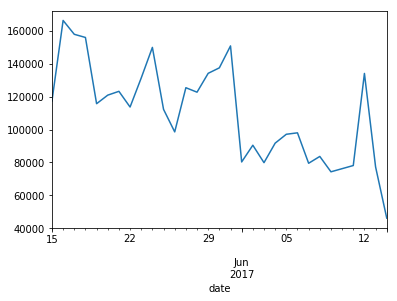

In [4]:
%matplotlib inline
df_visit_rate["visit"].plot()

### 分析2017年6月7号的数据

In [5]:
df_0607 = df[df["date"]=="2017/6/7"]

### 与6月6号进行环比

In [6]:
df_0606 = df[df["date"]=="2017/6/6"]

In [7]:
df_0606

,date,source,site,channel,media,visit
7943,2017-06-06,CRM,准会员,电视,APP,22456
7944,2017-06-06,品牌营销_品牌词,品牌词产品,播放器播放标签,PC,19754
7945,2017-06-06,SEO,百度,PC,-,11149
7946,2017-06-06,SEO,百度,WAP,-,9311
7947,2017-06-06,品牌营销_品牌词,品牌词导航,pc_全站顶导_超级电视入口,PC,4756
7948,2017-06-06,其它,四次元_应用,品牌词视频,android,3665
7949,2017-06-06,CRM,准会员,商城,APP,2511
7950,2017-06-06,其它,四次元_应用,品牌词应用商店,android,2251
7951,2017-06-06,SEO,搜狗,WAP,-,2004
7952,2017-06-06,手机_品牌营销_品牌词,品牌词产品,android_首页购物车_入口,移动端,1751


### 按source进行环比

In [8]:
df_0606_source = df_0606.groupby("source")["visit"].sum()
df_0607_source = df_0607.groupby("source")["visit"].sum()
df_0606_source

source
BD营销               4
CRM            28599
DSP               21
SEO            22857
o2o                2
公众号             1428
其它              6536
品牌营销_品牌词       29233
品牌营销_外网            4
手机_DSP            10
手机_品牌营销_品牌词     6027
手机_搜索            207
手机_百度SDK          17
手机_社会化联盟         492
手机_精准营销           59
手机_网站联盟          117
搜索               718
社会化传播            144
社会化联盟            185
移动               846
精准营销             104
网站联盟             374
Name: visit, dtype: int64

In [9]:
source_diff = (df_0607_source - df_0606_source).round(3).rename("diff")
source_diff_sum = source_diff.sum()
source_diff_rate = ((df_0607_source - df_0606_source)/df_0606_source).round(3).rename("diff_rate")
source_diff_rate_sum = source_diff_rate.sum()
source = pd.concat((source_diff,source_diff_rate),axis =1)
source.sort_values("diff_rate",ascending =True)


,diff,diff_rate
source,,
手机_DSP,-7,-0.700
CRM,-17591,-0.615
BD营销,-2,-0.500
o2o,-1,-0.500
DSP,-9,-0.429
手机_社会化联盟,-116,-0.236
手机_品牌营销_品牌词,-1062,-0.176
精准营销,-11,-0.106
其它,-631,-0.097


### 按crm进行分析

In [16]:
df_CRM_0606 = df_0606[df_0606["source"]=="CRM"]
df_CRM_0607 = df_0607[df_0607["source"]=="CRM"]
df_CRM_0607 

,date,source,site,channel,media,visit
8283,2017-06-07,CRM,准会员,商城,APP,4111
8285,2017-06-07,CRM,准会员,电视,APP,3432
8291,2017-06-07,CRM,准会员,商城,电视推送,1280
8293,2017-06-07,CRM,准会员,电视,电视推送,1267
8296,2017-06-07,CRM,准会员,商城,邮箱,650
8323,2017-06-07,CRM,准会员,商城,站内信,101
8327,2017-06-07,CRM,会员,商城,邮箱,73
8344,2017-06-07,CRM,准会员,手机,APP,29
8376,2017-06-07,CRM,准会员,商城,短信,11
8384,2017-06-07,CRM,准会员,手机,电视推送,10


In [20]:
df_CRM_diff = df_CRM_0607.groupby("site")["visit"].sum()-df_CRM_0606.groupby("site")["visit"].sum()
df_CRM_diff

site
会员        -17.0
准会员    -17575.0
生态内         1.0
电视推送        NaN
短信          0.0
邮件          NaN
邮箱         -2.0
Name: visit, dtype: float64

In [21]:
df_CRM_diff_rate = df_CRM_diff/(df_CRM_0606.groupby("site")["visit"].sum())
df_CRM_diff_rate.sort_values()

site
准会员    -0.616818
邮箱     -0.500000
会员     -0.175258
短信      0.000000
生态内     0.250000
电视推送         NaN
邮件           NaN
Name: visit, dtype: float64

### 分析准会员

In [25]:
df_site_0606 = df_0606[(df_0606["source"]=="CRM")&(df_0606["site"]=="准会员")]
df_site_0607 = df_0607[(df_0607["source"]=="CRM")&(df_0607["site"]=="准会员")]
df_site_0607

,date,source,site,channel,media,visit
8283,2017-06-07,CRM,准会员,商城,APP,4111
8285,2017-06-07,CRM,准会员,电视,APP,3432
8291,2017-06-07,CRM,准会员,商城,电视推送,1280
8293,2017-06-07,CRM,准会员,电视,电视推送,1267
8296,2017-06-07,CRM,准会员,商城,邮箱,650
8323,2017-06-07,CRM,准会员,商城,站内信,101
8344,2017-06-07,CRM,准会员,手机,APP,29
8376,2017-06-07,CRM,准会员,商城,短信,11
8384,2017-06-07,CRM,准会员,手机,电视推送,10
8386,2017-06-07,CRM,准会员,电视,短信,10


In [26]:
df_site_0606

,date,source,site,channel,media,visit
7943,2017-06-06,CRM,准会员,电视,APP,22456
7949,2017-06-06,CRM,准会员,商城,APP,2511
7955,2017-06-06,CRM,准会员,商城,电视推送,1304
7956,2017-06-06,CRM,准会员,电视,电视推送,1307
7959,2017-06-06,CRM,准会员,商城,邮箱,719
7983,2017-06-06,CRM,准会员,商城,站内信,118
8012,2017-06-06,CRM,准会员,商城,短信,25
8025,2017-06-06,CRM,准会员,手机,APP,17
8033,2017-06-06,CRM,准会员,电视,短信,16
8069,2017-06-06,CRM,准会员,手机,电视推送,7


In [29]:
df_channel_diff = df_site_0607.groupby("channel")["visit"].sum()-df_site_0606.groupby("channel")["visit"].sum()
df_channel_diff

channel
乐迷日        NaN
商城      1476.0
手机        19.0
电视    -19070.0
配件         NaN
Name: visit, dtype: float64

In [31]:
df_channel_diff_rate = df_channel_diff/(df_site_0606.groupby("channel")["visit"].sum())
df_channel_diff_rate.sort_values()

channel
电视    -0.801732
商城     0.315587
手机     0.655172
乐迷日         NaN
配件          NaN
Name: visit, dtype: float64

### 分析电视

In [32]:
df_media_0606 = df_0606[(df_0606["source"]=="CRM")&(df_0606["site"]=="准会员")&(df_0606["channel"]=="电视")]
df_media_0607 = df_0607[(df_0607["source"]=="CRM")&(df_0607["site"]=="准会员")&(df_0607["channel"]=="电视")]
df_media_0607

,date,source,site,channel,media,visit
8285,2017-06-07,CRM,准会员,电视,APP,3432
8293,2017-06-07,CRM,准会员,电视,电视推送,1267
8386,2017-06-07,CRM,准会员,电视,短信,10
8415,2017-06-07,CRM,准会员,电视,站内信,6
8539,2017-06-07,CRM,准会员,电视,邮箱,1


In [33]:
df_media_diff = df_media_0607.groupby("media")["visit"].sum()-df_media_0606.groupby("media")["visit"].sum()
df_media_diff

media
APP    -19024
电视推送      -40
短信         -6
站内信         1
邮箱         -1
Name: visit, dtype: int64

In [34]:
df_media_diff_rate = df_media_diff/(df_media_0606.groupby("media")["visit"].sum())
df_media_diff_rate.sort_values()

media
APP    -0.847168
邮箱     -0.500000
短信     -0.375000
电视推送   -0.030604
站内信     0.200000
Name: visit, dtype: float64